<a href="https://colab.research.google.com/github/YashShah-35/Learning-NLP/blob/main/NLP_analysis_attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
# Read in the chat data from a file
with open('/content/chat1.txt', 'r') as f:
    chat_data = f.read()



In [30]:
# Tokenize the chat data into individual words
words = word_tokenize(chat_data)



In [31]:
# Remove stop words (common words like "the" and "and")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if not word in stop_words]



In [32]:
# Calculate the sentiment of the chat using the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(chat_data)

print('Sentiment analysis:')
print(f'Positive: {sentiment_scores["pos"]:.2f}')
print(f'Neutral: {sentiment_scores["neu"]:.2f}')
print(f'Negative: {sentiment_scores["neg"]:.2f}')



Sentiment analysis:
Positive: 0.06
Neutral: 0.91
Negative: 0.04


In [33]:
# Count the frequency of each word in the chat
word_freq = nltk.FreqDist(filtered_words)
word_freq


FreqDist({':': 40264, ',': 40142, '-': 40002, 'Vanshika': 22535, 'PM': 20818, 'AM': 19173, 'Yash': 17515, 'hai': 3781, '?': 3156, '<': 2681, ...})

In [34]:
# Print the 10 most common words and their frequency
print('\nTop 10 most common words:')
for word, frequency in word_freq.most_common(10):
    print(f'{word}: {frequency}')



Top 10 most common words:
:: 40264
,: 40142
-: 40002
Vanshika: 22535
PM: 20818
AM: 19173
Yash: 17515
hai: 3781
?: 3156
<: 2681


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the chat data into a pandas dataframe
chat_data = pd.read_csv('/content/cha.txt', sep='\t', names=['datetime', 'sender', 'message'])
chat_data

,datetime,sender,message
0,"6/17/22, 12:07 PM - Vanshika: Hmm",NaN,NaN
1,"6/17/22, 12:39 PM - Yash: Nikala hu",NaN,NaN
2,"6/17/22, 12:59 PM - Vanshika: Abhi",NaN,NaN
3,"6/17/22, 12:59 PM - Vanshika: Bro",NaN,NaN
4,"6/17/22, 12:59 PM - Vanshika: Late thase aavta",NaN,NaN
...,...,...,...
39984,"2/28/23, 11:58 PM - Yash: Tu pan aam aj bole che",NaN,NaN
39985,"2/28/23, 11:59 PM - Vanshika: 😑",NaN,NaN
39986,"2/28/23, 11:59 PM - Yash: Are",NaN,NaN
39987,"3/1/23, 8:10 AM - Vanshika: Missed voice call",NaN,NaN


In [88]:

# Split the chat data into separate columns for the sender and message
chat_data[['datetime', 'sender_message']] = chat_data['datetime'].str.split(' - ', n=1, expand=True)
chat_data[['sender', 'message']] = chat_data['sender_message'].str.split(': ', n=1, expand=True)
chat_data


,datetime,sender,message,sender_message
0,"6/17/22, 12:07 PM",Vanshika,Hmm,Vanshika: Hmm
1,"6/17/22, 12:39 PM",Yash,Nikala hu,Yash: Nikala hu
2,"6/17/22, 12:59 PM",Vanshika,Abhi,Vanshika: Abhi
3,"6/17/22, 12:59 PM",Vanshika,Bro,Vanshika: Bro
4,"6/17/22, 12:59 PM",Vanshika,Late thase aavta,Vanshika: Late thase aavta
...,...,...,...,...
39984,"2/28/23, 11:58 PM",Yash,Tu pan aam aj bole che,Yash: Tu pan aam aj bole che
39985,"2/28/23, 11:59 PM",Vanshika,😑,Vanshika: 😑
39986,"2/28/23, 11:59 PM",Yash,Are,Yash: Are
39987,"3/1/23, 8:10 AM",Vanshika,Missed voice call,Vanshika: Missed voice call


In [89]:

# Convert the datetime column to a datetime object
chat_data['datetime'] = pd.to_datetime(chat_data['datetime'], format='%m/%d/%y, %I:%M %p' )

# Extract the date and time components from the datetime column
chat_data['date'] = chat_data['datetime'].dt.date
chat_data['time'] = chat_data['datetime'].dt.time



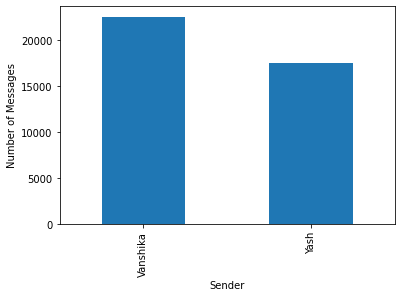

In [90]:
# Calculate the number of messages sent by each sender
message_counts = chat_data['sender'].value_counts()

# Plot the message counts as a bar chart
message_counts.plot(kind='bar')
plt.xlabel('Sender')
plt.ylabel('Number of Messages')
plt.show()


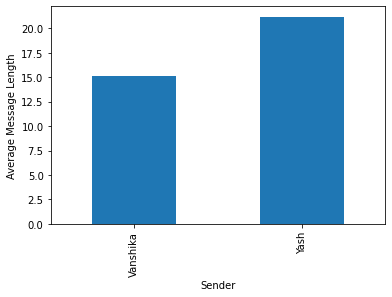

In [91]:

# Calculate the average message length for each sender
avg_message_length = chat_data.groupby('sender')['message'].apply(lambda x: x.str.len().mean())

# Plot the average message length as a bar chart
avg_message_length.plot(kind='bar')
plt.xlabel('Sender')
plt.ylabel('Average Message Length')
plt.show()



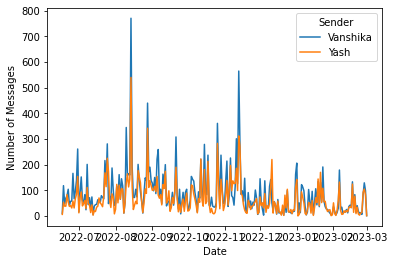

In [92]:
# Calculate the number of messages sent by each sender per day
messages_per_day = chat_data.groupby(['date', 'sender']).size().unstack(fill_value=0)

# Plot the messages per day as a line chart
messages_per_day.plot()
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend(title='Sender')
plt.show()
